# Chap1. 평균필터 (Average Filter)

In [86]:
import numpy as np
import matplotlib.pyplot as plt


def get_volt(value):
    output = value + np.random.normal(0,1)  # 입력한 value에 대해서 0을 기준으로 표준편차 1를 가지는 가우시안 분포에서 노이즈를 가짐
    return output

In [87]:
def AvgFilter(k,preAvg,x):  # 재귀적 평균필터의 식을 이용하여 함수 작성
    alpha = (k-1)/k
    avg = alpha * preAvg + (1 - alpha) * x
    return avg

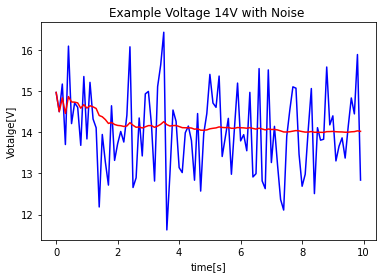

In [101]:
dt = 0.1
volt = 14

t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = np.zeros(t.shape)


AvgSaved = [] #Plot하기위한 리스트 선언

for i in range(t.shape[0]):
    
    nSamples[i] = get_volt(14)
    
    if i == 0 :
        avg = nSamples[i]
        AvgSaved.append(avg)
        
    else :
        avg = AvgFilter(i,avg,nSamples[i])
        AvgSaved.append(avg)

plt.title("Example Voltage {}V with Noise ".format(volt))
plt.ylabel("Votalge[V]")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')


실험 그래프를 보면 초기에는 데이터 수가 적어 감도있게 반응하다 데이터가 수가 누적될 수록 오차를 잡아내며 

측정 전압 값 14V로 근사해 가는 모습을 볼 수 있다.